In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import pylab as pl
%matplotlib inline

In [3]:
path="/content/drive/MyDrive/courseworkCovid/Africa_Covid.csv"

In [7]:
import chardet

with open(path, 'rb') as file:
    result = chardet.detect(file.read())
    print(result)
    encoding = result['encoding']

data = pd.read_csv(path, encoding=encoding)

{'encoding': 'Windows-1252', 'confidence': 0.73, 'language': ''}


In [8]:
data.head(5)

,Name,Cases_cumulative tota,Cases _newly reported in last 7 days,Cases _newly reported in last 24 hours,Deaths _cumulative total
0,South Africa,1369426,91123,12710,38854
1,Ethiopia,132034,2589,307,2044
2,Nigeria,114691,10692,1386,1478
3,Algeria,104606,1965,265,2854
4,Kenya,99444,889,136,1736


In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

In [13]:
data.columns

Index(['Name', 'Cases_cumulative tota', 'Cases _newly reported in last 7 days',
       'Cases _newly reported in last 24 hours', 'Deaths _cumulative total'],
      dtype='object')

In [14]:
df=data

In [17]:
X=df[['Cases_cumulative tota', 'Cases _newly reported in last 24 hours']]
y=df['Deaths _cumulative total']

In [18]:
#split the data, training and testing data sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [20]:
y_pred=model.predict(X_test) #prediction on the test set

In [22]:
#model evaluation
mse = mean_squared_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)

In [23]:
intercept = model.intercept_
coefficients = model.coef_

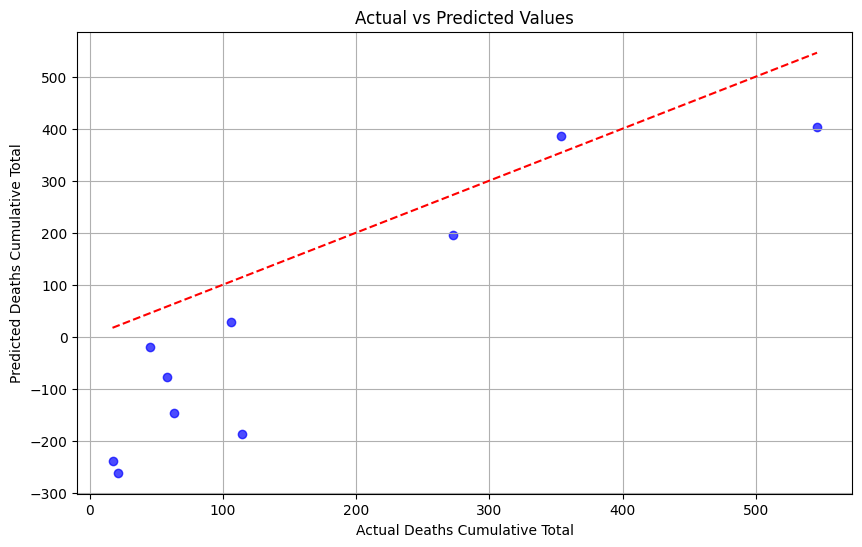

In [24]:
#plot of actual Vs predicted
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.7)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Actual Deaths Cumulative Total')
plt.ylabel('Predicted Deaths Cumulative Total')
plt.title('Actual vs Predicted Values')
plt.grid()
plt.show()

In [25]:
print("Model Equation:")
print(f"Y = {intercept:.2f} + {coefficients[0]:.4f}X1 + {coefficients[1]:.4f}X2")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-Squared Value: {r_squared:.4f}")

Model Equation:
Y = -274.75 + 0.0257X1 + 0.2888X2
Mean Squared Error (MSE): 33647.71
R-Squared Value: -0.2137
